# ML Foreclosure Binary Classification - 2.5% sample data
Only "resolved" outcomes - Either paid off or default 

    target = zeroBalCode (set to object dtype) 
    Binary classification sets zeroBalCode to either "0" or "1" for the 7 possible outcomes
    
    "0" = "Loan Success"
        * 01 = Prepaid or Matured
        * 06 = Repurchased
        * 16 = Reperforming Loan Sale

    "1" =  "Loan Failure" - Most likely loss of money (but not necessarily) one of below conditions:
        * 02 = Third Party Sale
        * 03 = Short Sale
        * 09 = Deed-in-Lieu,REO
        * 15 = Note Sale


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#!pip install pycaret
from imblearn.over_sampling import RandomOverSampler
from pycaret.classification import *
#from pycaret.regression import *
pd.set_option('display.max_columns', None)


# Importing the data - only use *.ML.csv files!!!
If you have *.MLReady.csv then [click here](#MLReady)

In [2]:
df=pd.read_csv("data/FM_Acq2_Perf_FMAC_EPOCH1_loanAge.csv")
df.head()

,Unnamed: 0,id,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origDate,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,monMatur,mSA,zeroBalCode,deliqGood,deliqBad,deliqMax,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,fredRate,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct
0,0,102718910405,R,"JPMORGAN CHASE BANK, NA",8.500,187000,360,2000-02-01,80.0,90.0,2.0,31.0,P,MI,483,0.0,0.0,712.0,706.0,709.0,70,290.0,19820,1.0,50,20,2.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021
1,1,103123692845,B,"JPMORGAN CHASE BANK, NA",8.500,243000,360,2000-02-01,80.0,95.0,1.0,49.0,P,CA,926,0.0,0.0,682.0,682.0,682.0,21,339.0,31100,1.0,17,4,1.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021
2,2,117311391991,B,"JPMORGAN CHASE BANK, NA",8.000,253000,360,2000-02-01,79.0,89.0,2.0,34.0,P,CA,953,0.0,0.0,810.0,784.0,797.0,36,324.0,44700,1.0,33,3,1.0,8.38,8.25,8.325,0.015758,6.62,-0.380,0.250,-0.325,-0.045346,0.030303,-0.039039
3,3,135950664937,R,"JPMORGAN CHASE BANK, NA",8.500,138000,360,2000-02-01,80.0,95.0,1.0,30.0,P,MA,17,0.0,0.0,718.0,718.0,718.0,16,344.0,14460,1.0,14,2,1.0,8.38,8.25,8.325,0.015758,6.62,0.120,-0.250,0.175,0.014320,-0.030303,0.021021
4,4,226095365894,B,"JPMORGAN CHASE BANK, NA",8.875,166000,360,2000-02-01,80.0,95.0,2.0,24.0,P,MA,18,0.0,0.0,782.0,752.0,767.0,24,336.0,14460,1.0,23,1,1.0,8.38,8.25,8.325,0.015758,6.62,0.495,-0.625,0.550,0.059069,-0.075758,0.066066


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278367 entries, 0 to 2278366
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   id                  int64  
 2   origChannel         object 
 3   sellerName          object 
 4   origIntRate         float64
 5   origUPB             int64  
 6   origLoanTerm        int64  
 7   origDate            object 
 8   origLTV             float64
 9   origCLTV            float64
 10  numBorrowers        float64
 11  origDebtIncRatio    float64
 12  loanPurp            object 
 13  propState           object 
 14  zipCode             int64  
 15  pMIperct            float64
 16  mortInsType         float64
 17  bestCreditScore     float64
 18  worstCreditScore    float64
 19  avgCreditScore      float64
 20  loanAge             int64  
 21  monMatur            float64
 22  mSA                 int64  
 23  zeroBalCode         float64
 24  deliqGood           int6

## Remove columns not involved in 'Foreclosure or Not' query

In [4]:
df.drop(['Unnamed: 0','id','fredRate','monMatur','deliqGood','deliqBad','deliqMax'],1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278367 entries, 0 to 2278366
Data columns (total 31 columns):
 #   Column              Dtype  
---  ------              -----  
 0   origChannel         object 
 1   sellerName          object 
 2   origIntRate         float64
 3   origUPB             int64  
 4   origLoanTerm        int64  
 5   origDate            object 
 6   origLTV             float64
 7   origCLTV            float64
 8   numBorrowers        float64
 9   origDebtIncRatio    float64
 10  loanPurp            object 
 11  propState           object 
 12  zipCode             int64  
 13  pMIperct            float64
 14  mortInsType         float64
 15  bestCreditScore     float64
 16  worstCreditScore    float64
 17  avgCreditScore      float64
 18  loanAge             int64  
 19  mSA                 int64  
 20  zeroBalCode         float64
 21  fmacRateMax         float64
 22  fmacRateMin         float64
 23  fmacRateAvg         float64
 24  fmacRateVolatility  floa

### Check if any columns have a null value

In [6]:
df.apply(lambda x: x.isnull().sum(), axis=0)

origChannel           0
sellerName            0
origIntRate           0
origUPB               0
origLoanTerm          0
origDate              0
origLTV               0
origCLTV              0
numBorrowers          0
origDebtIncRatio      0
loanPurp              0
propState             0
zipCode               0
pMIperct              0
mortInsType           0
bestCreditScore       0
worstCreditScore      0
avgCreditScore        0
loanAge               0
mSA                   0
zeroBalCode           0
fmacRateMax           0
fmacRateMin           0
fmacRateAvg           0
fmacRateVolatility    0
rateDiffAbove         0
rateDiffBelow         0
rateDiffAvg           0
rateDiffAbovePct      0
rateDiffBelowPct      0
rateDiffAvgPct        0
dtype: int64

## Engineer originDate into Date features

In [7]:
df['origDate'] = pd.to_datetime(df['origDate'])

In [8]:
df['origYear'] = df['origDate'].dt.year
df['origMonth'] = df['origDate'].dt.month

In [9]:
df.drop(['origDate'],1,inplace=True)

In [10]:
df[['origYear','origMonth']].head()

,origYear,origMonth
0,2000,2
1,2000,2
2,2000,2
3,2000,2
4,2000,2


## Use a subset of Epoch 1 - 1999-2004

In [11]:
yearFilter = [1999,2000,2001,2002,2003,2004]
df = df[df.origYear.isin(yearFilter)]
df.shape

(1639223, 32)

# Turn zero Balance Code Into binary "0" GOOD and "1" BAD

In [12]:
df.zeroBalCode.unique()

array([ 1.,  6.,  9.,  3.,  2., 15., 16.])

In [13]:
df['zeroBalCode'] = df.zeroBalCode.replace([1,6,16],0)
df['zeroBalCode'] = df.zeroBalCode.replace([9,3,2,15],1)

In [14]:
df.zeroBalCode.unique()

array([0., 1.])

In [15]:
#Checking datatypes of individual feature
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,R,"JPMORGAN CHASE BANK, NA",8.500,187000,360,80.0,90.0,2.0,31.0,P,MI,483,0.0,0.0,712.0,706.0,709.0,70,19820,0.0,8.38,8.25,8.325,0.015758,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,2000,2
1,B,"JPMORGAN CHASE BANK, NA",8.500,243000,360,80.0,95.0,1.0,49.0,P,CA,926,0.0,0.0,682.0,682.0,682.0,21,31100,0.0,8.38,8.25,8.325,0.015758,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,2000,2
2,B,"JPMORGAN CHASE BANK, NA",8.000,253000,360,79.0,89.0,2.0,34.0,P,CA,953,0.0,0.0,810.0,784.0,797.0,36,44700,0.0,8.38,8.25,8.325,0.015758,-0.380,0.250,-0.325,-0.045346,0.030303,-0.039039,2000,2
3,R,"JPMORGAN CHASE BANK, NA",8.500,138000,360,80.0,95.0,1.0,30.0,P,MA,17,0.0,0.0,718.0,718.0,718.0,16,14460,0.0,8.38,8.25,8.325,0.015758,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,2000,2
4,B,"JPMORGAN CHASE BANK, NA",8.875,166000,360,80.0,95.0,2.0,24.0,P,MA,18,0.0,0.0,782.0,752.0,767.0,24,14460,0.0,8.38,8.25,8.325,0.015758,0.495,-0.625,0.550,0.059069,-0.075758,0.066066,2000,2


# Review values for dates and slice (if needed) the timeframe you want

In [16]:
df.origYear.unique()

array([2000, 1999, 2001, 2002, 2003, 2004], dtype=int64)

In [17]:
df['origMonth'].unique()

array([ 2, 12, 10,  1, 11,  9,  4,  3,  5,  6,  8,  7], dtype=int64)

In [18]:
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,zeroBalCode,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth
0,R,"JPMORGAN CHASE BANK, NA",8.500,187000,360,80.0,90.0,2.0,31.0,P,MI,483,0.0,0.0,712.0,706.0,709.0,70,19820,0.0,8.38,8.25,8.325,0.015758,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,2000,2
1,B,"JPMORGAN CHASE BANK, NA",8.500,243000,360,80.0,95.0,1.0,49.0,P,CA,926,0.0,0.0,682.0,682.0,682.0,21,31100,0.0,8.38,8.25,8.325,0.015758,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,2000,2
2,B,"JPMORGAN CHASE BANK, NA",8.000,253000,360,79.0,89.0,2.0,34.0,P,CA,953,0.0,0.0,810.0,784.0,797.0,36,44700,0.0,8.38,8.25,8.325,0.015758,-0.380,0.250,-0.325,-0.045346,0.030303,-0.039039,2000,2
3,R,"JPMORGAN CHASE BANK, NA",8.500,138000,360,80.0,95.0,1.0,30.0,P,MA,17,0.0,0.0,718.0,718.0,718.0,16,14460,0.0,8.38,8.25,8.325,0.015758,0.120,-0.250,0.175,0.014320,-0.030303,0.021021,2000,2
4,B,"JPMORGAN CHASE BANK, NA",8.875,166000,360,80.0,95.0,2.0,24.0,P,MA,18,0.0,0.0,782.0,752.0,767.0,24,14460,0.0,8.38,8.25,8.325,0.015758,0.495,-0.625,0.550,0.059069,-0.075758,0.066066,2000,2


In [19]:
#df = fillna(df)

# Coerce the column dtype (int in this case)

In [20]:
df = df.astype({'origLTV':'int','origCLTV':'int','numBorrowers':'int','origDebtIncRatio':'int',\
               'mortInsType':'int','bestCreditScore':'int','loanAge':'int',\
               'worstCreditScore':'int','avgCreditScore':'int','zeroBalCode':'int'})
#,'zeroBalCode':'int'

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639223 entries, 0 to 1639222
Data columns (total 32 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   origChannel         1639223 non-null  object 
 1   sellerName          1639223 non-null  object 
 2   origIntRate         1639223 non-null  float64
 3   origUPB             1639223 non-null  int64  
 4   origLoanTerm        1639223 non-null  int64  
 5   origLTV             1639223 non-null  int32  
 6   origCLTV            1639223 non-null  int32  
 7   numBorrowers        1639223 non-null  int32  
 8   origDebtIncRatio    1639223 non-null  int32  
 9   loanPurp            1639223 non-null  object 
 10  propState           1639223 non-null  object 
 11  zipCode             1639223 non-null  int64  
 12  pMIperct            1639223 non-null  float64
 13  mortInsType         1639223 non-null  int32  
 14  bestCreditScore     1639223 non-null  int32  
 15  worstCreditScor

<a id='MLReady'></a>

<a id='MLReady'></a>
## *MLReady.csv file loading point
uncomment one of the boxes below

In [22]:
#df.to_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

In [23]:
#df = pd.read_csv('D:\FM_FULL_EPOCH2_MLReady.csv')

# Oversampling (Since we are starting with only 6.3% of our predicted class)

In [24]:
good = df.zeroBalCode.value_counts()[0]
bad = df.zeroBalCode.value_counts()[1]
perct_bad = round(bad/(good + bad)*100,2)
print(f'We have {perct_bad}% Foreclosures in our dataset')

We have 9.59% Foreclosures in our dataset


In [25]:
from sklearn.model_selection import train_test_split

training_features, test_features, \
training_target, test_target, = train_test_split(
    df.drop(['zeroBalCode'], axis=1)
    , df['zeroBalCode']
    , test_size = .1
    , random_state=12
)

In [26]:
# Further split the training data into training/test
x_train, x_val, y_train, y_val = train_test_split(
    training_features
    , training_target
    , test_size = .1
    ,random_state=12
)

In [27]:
# For the training data, randomly sample 
ros = RandomOverSampler(sampling_strategy='minority')
x_train_res, y_train_res = ros.fit_sample(x_train, y_train)

In [28]:
print('#############################################')
print('Before oversampling: "Closed" crushes "Default" and causes issues:')
print(training_target.value_counts())
print('')
print('Before oversampling: "Closed" and "Default" are equal')
print(y_train_res.value_counts())

#############################################
Before oversampling: "Closed" crushes "Default" and causes issues:
0    1333945
1     141355
Name: zeroBalCode, dtype: int64

Before oversampling: "Closed" and "Default" are equal
1    1200559
0    1200559
Name: zeroBalCode, dtype: int64


# Recombine X_train_res, y_train_res so PyCaret can deal with one df

In [29]:
y_train_res.shape

(2401118,)

In [30]:
df = x_train_res.copy()

In [31]:
df['zeroBalCode'] = y_train_res

In [32]:
df.shape

(2401118, 32)

# Review metrics last time before run (to have record of starting values)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401118 entries, 0 to 2401117
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   origChannel         object 
 1   sellerName          object 
 2   origIntRate         float64
 3   origUPB             int64  
 4   origLoanTerm        int64  
 5   origLTV             int32  
 6   origCLTV            int32  
 7   numBorrowers        int32  
 8   origDebtIncRatio    int32  
 9   loanPurp            object 
 10  propState           object 
 11  zipCode             int64  
 12  pMIperct            float64
 13  mortInsType         int32  
 14  bestCreditScore     int32  
 15  worstCreditScore    int32  
 16  avgCreditScore      int32  
 17  loanAge             int32  
 18  mSA                 int64  
 19  fmacRateMax         float64
 20  fmacRateMin         float64
 21  fmacRateAvg         float64
 22  fmacRateVolatility  float64
 23  rateDiffAbove       float64
 24  rateDiffBelow       floa

In [34]:
df.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode
0,R,"GMAC MORTGAGE, LLC",6.750,239000,360,80,80,2,27,C,NJ,76,0.0,0,672,637,654,26,35620,7.15,6.89,7.0325,0.037736,-0.400,0.140,-0.2825,-0.055944,0.020319,-0.040171,2001,1,0
1,C,OTHER,6.000,255000,360,85,85,1,35,R,AL,367,12.0,1,721,721,721,41,0,6.03,5.83,5.9325,0.034305,-0.030,-0.170,0.0675,-0.004975,-0.029160,0.011378,2003,11,1
2,R,OTHER,5.750,250000,360,64,64,2,60,C,NJ,88,0.0,0,757,699,728,30,35620,5.97,5.85,5.9160,0.020513,-0.220,0.100,-0.1660,-0.036851,0.017094,-0.028059,2003,1,0
3,R,OTHER,5.875,172000,360,95,95,2,33,P,FL,327,30.0,1,733,733,733,13,36740,5.81,5.68,5.7520,0.022887,0.065,-0.195,0.1230,0.011188,-0.034331,0.021384,2004,12,0
4,C,"JPMORGAN CHASE BANK, NA",5.000,323000,360,78,78,2,59,R,GA,305,0.0,0,697,697,697,104,0,6.34,6.14,6.2640,0.032573,-1.340,1.140,-1.2640,-0.211356,0.185668,-0.201788,2003,8,0


# Pycaret - Setup with categorical definition

In [37]:
model_setup = setup(df, target = 'zeroBalCode')

Setup Succesfully Completed!


,Description,Value
0,session_id,3264
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2401118, 32)"
4,Missing Values,False
5,Numeric Features,25
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


### Use complex setup 

In [38]:
# model_setup = setup(
#     df
#     , target = 'zeroBalCode' # PyCaret will list this as "Label"
#     , pca = False 
#     , ignore_low_variance = True # Variance is calculated using the ratio of unique values to the number of samples, and the ratio of the most common value to the frequency of the second most common value.
#     , normalize = True
#     , ignore_features = None
#     , handle_unknown_categorical = True
#     , remove_outliers = True # outliers from the training data are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
# #     , bin_numeric_features = [
# #             'origIntRate'
# #             , 'origUPB'
# #             , 'origLTV'
# #             , 'origDebtIncRatio'
# #             , 'bestCreditScore'
# #             , 'avgCreditScore'
# #             , 'worstCreditScore'
# #         ] # Set to True to bin numerics using K Means
#     , feature_interaction = False
#     , feature_selection = True
#     , silent = True
#     , profile = False
#     , categorical_features = [
#              'origChannel'
#             , 'sellerName'
#             , 'loanPurp'
#             , 'propState'
#             , 'origYear'
#             , 'origMonth'
#             , 'mSA'
#             , 'zipCode'
#             , 'mortInsType'
#             , 'origLoanTerm'
#         ]
#         , numeric_features = [
#             'origIntRate'
#             , 'numBorrowers'
#             , 'origUPB'
#             , 'origLTV'
#             , 'origCLTV'
#             , 'pMIperct'
#             , 'loanAge'
#             , 'origDebtIncRatio'
#             , 'worstCreditScore'
#             , 'bestCreditScore'
#             , 'avgCreditScore'
#             , 'rateDiffAbove'
#             , 'rateDiffBelow'
#             , 'rateDiffAvg'
#             , 'rateDiffAbovePct'
#             , 'rateDiffBelowPct'
#             , 'rateDiffAvgPct'
#             , 'fmacRateMax'
#             , 'fmacRateMin'
#             , 'fmacRateAvg'
#             , 'fmacRateVolatility'
#         ]
# )


## Compare Models with no blacklist exclusions

In [39]:
model_results=compare_models(blacklist = ['lda']) #blacklist = ['tr','ransac'],'lar','par','huber','llar','lasso','en','ridge','omp','br','svm'])
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extra Trees Classifier,0.9364,0.9837,0.9439,0.9301,0.9369,0.8729,0.8730,58.5074
1,Random Forest Classifier,0.9120,0.9718,0.9414,0.8892,0.9145,0.8240,0.8255,4.5182
2,Decision Tree Classifier,0.8811,0.8811,0.9546,0.8322,0.8892,0.7621,0.7705,22.7301
3,CatBoost Classifier,0.7968,0.8795,0.8388,0.7738,0.8050,0.5936,0.5957,53.9799
4,Extreme Gradient Boosting,0.7864,0.8701,0.8283,0.7643,0.7950,0.5728,0.5748,64.2306
5,Light Gradient Boosting Machine,0.7742,0.8575,0.8180,0.7522,0.7837,0.5485,0.5506,4.2854
6,Gradient Boosting Classifier,0.7531,0.8337,0.7938,0.7341,0.7628,0.5062,0.5079,297.7376
7,Ada Boost Classifier,0.7337,0.8119,0.7475,0.7274,0.7373,0.4673,0.4675,78.8008
8,K Neighbors Classifier,0.7321,0.8091,0.8414,0.6905,0.7585,0.4643,0.4758,43.3675
9,Ridge Classifier,0.7244,0.0000,0.7480,0.7142,0.7307,0.4487,0.4492,1.5999


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3264, verbose=0,
                     warm_start=False)

## Create models 

### Extra Trees Classifier

In [40]:
et = create_model('et', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9381,0.9847,0.9463,0.9310,0.9386,0.8761,0.8762
1,0.9368,0.9839,0.9440,0.9307,0.9373,0.8736,0.8737
2,0.9369,0.9837,0.9426,0.9320,0.9373,0.8739,0.8739
3,0.9351,0.9827,0.9440,0.9275,0.9357,0.8702,0.8704
4,0.9353,0.9833,0.9433,0.9285,0.9358,0.8706,0.8707
5,0.9362,0.9835,0.9429,0.9304,0.9366,0.8724,0.8725
6,0.9346,0.9829,0.9414,0.9287,0.9350,0.8691,0.8692
7,0.9376,0.9844,0.9446,0.9316,0.9381,0.8753,0.8754
8,0.9372,0.9840,0.9451,0.9304,0.9376,0.8743,0.8744
9,0.9367,0.9839,0.9445,0.9300,0.9372,0.8734,0.8735


## Evaluate Models

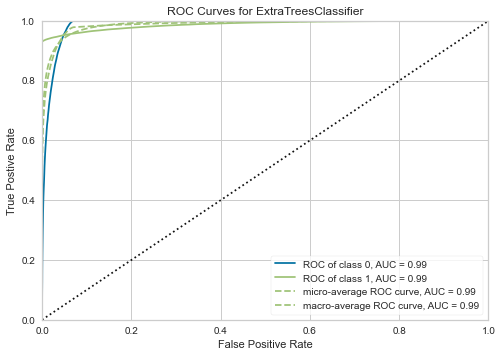

In [41]:
plot_model(et)

In [42]:
#plot_model(et, plot = 'threshold')

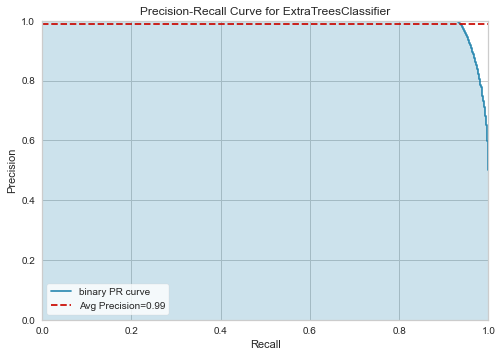

In [43]:
plot_model(et, plot = 'pr')

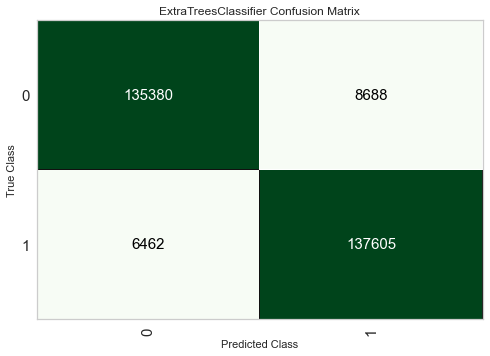

In [44]:
plot_model(et, plot='confusion_matrix')

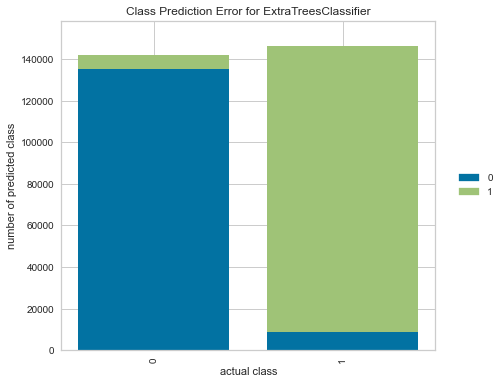

In [45]:
plot_model(et, plot = 'error')

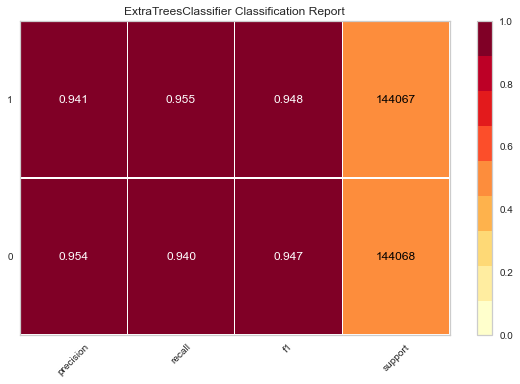

In [46]:
plot_model(et, plot = 'class_report')

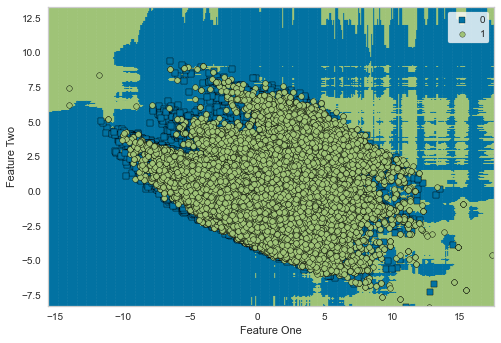

In [49]:
plot_model(et, plot = 'boundary')

In [50]:
#plot_model(et, plot='learning')

In [51]:
#plot_model(et, plot = 'manifold')

In [52]:
#plot_model(et, plot = 'calibration')

In [53]:
#plot_model(et, plot = 'vc')

In [54]:
#plot_model(et, plot='dimension')

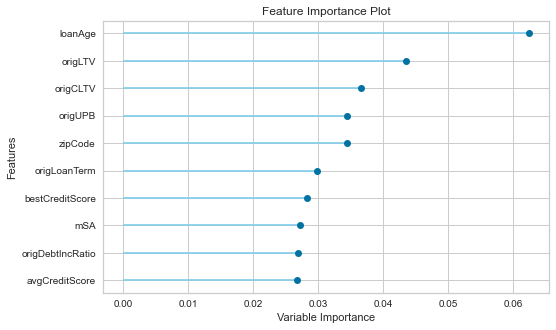

In [55]:
plot_model(et, plot = 'feature')

In [56]:
plot_model(et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


## Ensemble et model Bagging

In [77]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9376,0.9844,0.9462,0.9303,0.9381,0.8752,0.8754
1,0.9350,0.9833,0.9436,0.9276,0.9355,0.8699,0.8700
2,0.9351,0.9831,0.9428,0.9286,0.9356,0.8703,0.8704
3,0.9328,0.9822,0.9434,0.9238,0.9335,0.8656,0.8658
4,0.9343,0.9829,0.9433,0.9267,0.9349,0.8687,0.8688
5,0.9344,0.9830,0.9429,0.9271,0.9349,0.8687,0.8688
6,0.9338,0.9825,0.9418,0.9270,0.9343,0.8676,0.8677
7,0.9353,0.9836,0.9459,0.9264,0.9360,0.8707,0.8709
8,0.9341,0.9834,0.9440,0.9257,0.9348,0.8682,0.8684
9,0.9357,0.9836,0.9445,0.9281,0.9363,0.8714,0.8715


## Evaluate Models

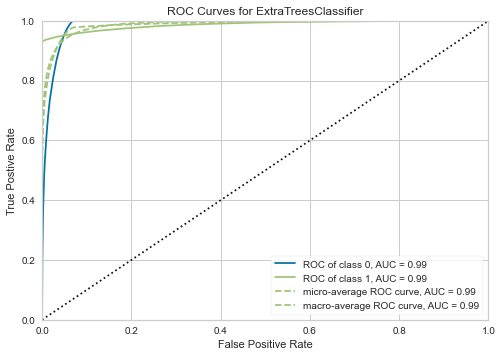

In [78]:
plot_model(tuned_et)

In [79]:
#plot_model(et, plot = 'threshold')

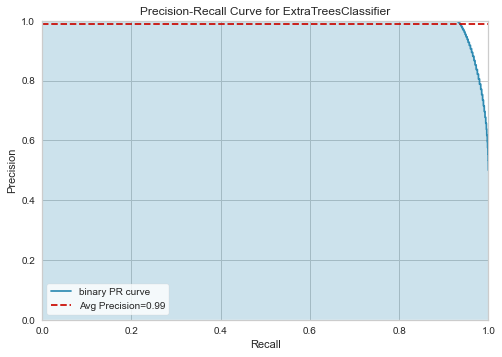

In [80]:
plot_model(tuned_et, plot = 'pr')

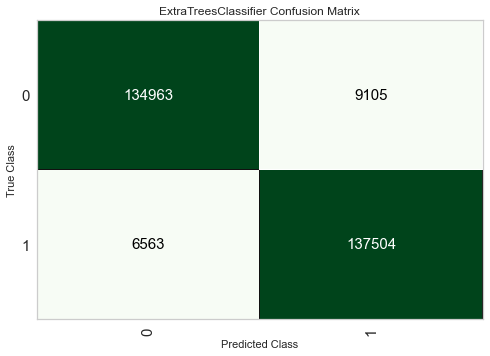

In [81]:
plot_model(tuned_et, plot='confusion_matrix')

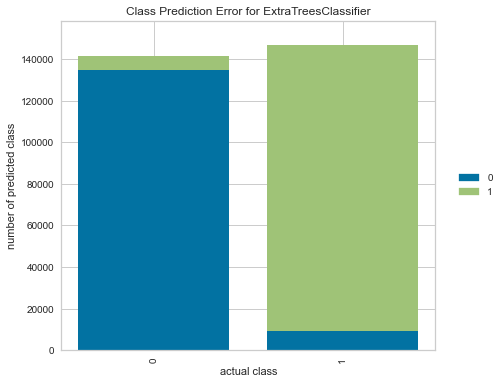

In [82]:
plot_model(tuned_et, plot = 'error')

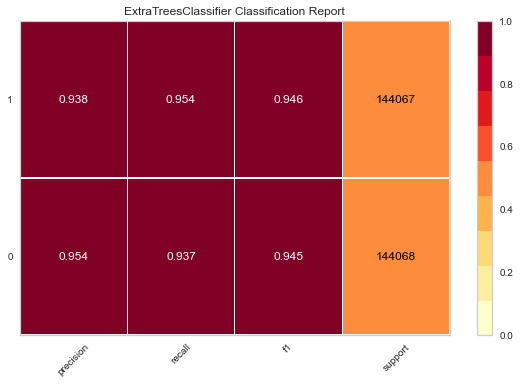

In [83]:
plot_model(tuned_et, plot = 'class_report')

In [85]:
#plot_model(tuned_et, plot = 'boundary')

In [ ]:
#plot_model(et, plot='learning')

In [ ]:
#plot_model(et, plot = 'manifold')

In [ ]:
#plot_model(et, plot = 'calibration')

In [ ]:
#plot_model(et, plot = 'vc')

In [ ]:
#plot_model(et, plot='dimension')

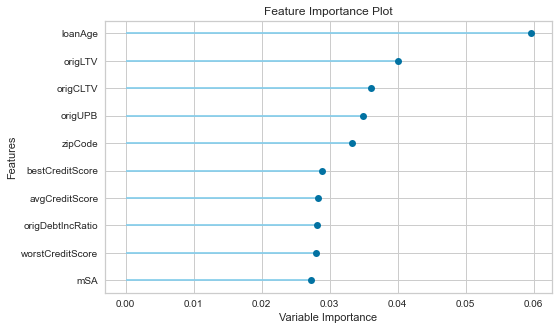

In [86]:
plot_model(tuned_et, plot = 'feature')

In [87]:
plot_model(tuned_et, plot = 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0
class_weight,None
criterion,entropy
max_depth,70
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0
min_impurity_split,None


# Predict models

# The golden moment... put 10% sample test data through the models...

# Recombine test_features, test_target at first train/test/split
 This "test" set was split BEFORE Oversampling. PyCaret takes the "train" from this split and splits it internally again. Since we have no control of how PyCaret does this we needed to do a train/test split before we input the training set into PyCaret. Now we will recombine the test_features and test_target into one new df

In [57]:
test_features.shape

(163923, 31)

In [58]:
test_target.shape

(163923,)

In [59]:
test_df = test_features.copy()

In [60]:
test_df['zeroBalCode'] = test_target

In [61]:
test_df.shape

(163923, 32)

In [62]:
totalTestCount = test_df.zeroBalCode.value_counts().sum()
posTestCount = test_df.zeroBalCode.value_counts()[1]
print('#############################################')
print('This "Test" set has not been oversamplied')
print(test_df.zeroBalCode.value_counts())
print(f'Positive samples are {round(posTestCount/totalTestCount*100,2)}%')

#############################################
This "Test" set has not been oversamplied
0    148046
1     15877
Name: zeroBalCode, dtype: int64
Positive samples are 9.69%


In [63]:
#plot_model(qda, plot = 'feature')

## Create Confusion Matrix output functions

In [64]:
def calc_confusion(row):
    if ((row['zeroBalCode'] == 0) & (row['Label'] == 0)):
        value = 'TrueNegative'
    elif ((row['zeroBalCode'] == 0) & (row['Label'] == 1)):
        value = 'FalsePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 1)):
        value = 'TruePositive'
    elif ((row['zeroBalCode'] == 1) & (row['Label'] == 0)):
        value = 'FalseNegative'
    else:
        value = 'Undefined'
    return value

In [65]:
def cM(df):
    print(f'           ##############################')
    print(f'           #             #              #')
    print(f'         0 #    {df["TrueNegative"]}     #     {df["FalseNegative"]}      #')
    print(f'  True     #             #              #')
    print(f'  Class    ##############################')
    print(f'           #             #              #')
    print(f'         1 #    {df["FalsePositive"]}      #     {df["TruePositive"]}      #')
    print(f'           #             #              #')
    print(f'           ##############################')
    print(f'                  0              1        ')
    print(f'                  Predicted Class           ')


In [66]:
def cMCalc():
    # 0 or 2 = Predict equals truth, 1 = Predict doesn't equal truth
    totalNegative = confusionMatrix['TrueNegative'] + confusionMatrix['FalseNegative']
    totalPositive = confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']
    total = totalNegative + totalPositive
    trueNegativePct = confusionMatrix['TrueNegative'] / total * 100
    falseNegativePct = confusionMatrix['FalseNegative'] / total * 100
    truePositivePct = confusionMatrix['TruePositive'] / total * 100
    falsePositivePct = confusionMatrix['FalsePositive'] / total * 100

    # Accuracy Calculation
    accuracy = (confusionMatrix['TruePositive'] + confusionMatrix['TrueNegative'])/(totalPositive + totalNegative)
    # Recall Calculation
    recall = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalseNegative']))
    # Precision Calculation
    precision = (confusionMatrix['TruePositive']/(confusionMatrix['TruePositive'] + confusionMatrix['FalsePositive']))

    print(f'TrueNegative:  {round(trueNegativePct,2)}%')
    print(f'FalseNegative:  {round(falseNegativePct,2)}%')
    print(f'TruePositive:   {round(truePositivePct,2)}%')
    print(f'FalsePositive: {round(falsePositivePct,2)}%')
    print(f'#####################################################')
    print(f'Accuracy: {round(accuracy,2)*100}%   Recall: {round(recall,2)*100}%   Precision: {round(precision,2)*100}%')
    print(f'#####################################################')

# Evaluate Models

# Extra Trees Classifier

In [67]:
predictions = predict_model(et, data=test_df)

In [68]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,C,SUNTRUST MORTGAGE INC.,5.250,70000,180,65,65,1,25,C,WA,986,0.0,0,757,757,757,127,38900,5.85,5.79,5.8125,0.010363,-0.600,0.540,-0.5625,-0.102564,0.093264,-0.096774,2003,4,0,0,0.05
1,C,"JPMORGAN CHASE BANK, NA",5.875,150000,360,53,53,1,27,P,CA,921,0.0,0,780,780,780,71,41740,5.85,5.79,5.8125,0.010363,0.025,-0.085,0.0625,0.004274,-0.014680,0.010753,2003,4,0,0,0.09
2,R,OTHER,7.875,180000,360,64,64,1,54,C,FL,331,0.0,0,603,603,603,28,33100,7.65,7.13,7.3820,0.072931,0.225,-0.745,0.4930,0.029412,-0.104488,0.066784,2000,12,0,0,0.11
3,C,"WELLS FARGO BANK, N.A.",5.000,233000,360,60,60,2,25,R,CA,926,0.0,0,759,759,759,108,31100,5.26,5.21,5.2300,0.009597,-0.260,0.210,-0.2300,-0.049430,0.040307,-0.043977,2003,6,0,0,0.13
4,R,"JPMORGAN CHASE BANK, NA",6.500,147000,360,80,80,1,26,P,GA,300,0.0,0,756,756,756,132,12060,7.14,7.01,7.0775,0.018545,-0.640,0.510,-0.5775,-0.089636,0.072753,-0.081597,2001,4,0,0,0.16


In [69]:
results = predictions[['zeroBalCode','Label','Score']]

In [70]:
predictions.Label.value_counts()

0    149069
1     14854
Name: Label, dtype: int64

In [71]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [72]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [73]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    138894     #     10175      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    9152      #     5702      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [74]:
cMCalc()

TrueNegative:  84.73%
FalseNegative:  6.21%
TruePositive:   3.48%
FalsePositive: 5.58%
#####################################################
Accuracy: 88.0%   Recall: 36.0%   Precision: 38.0%
#####################################################


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

In [ ]:
#save_model(et, 'extraTrees2.5OS5050_082220')

In [ ]:
#save_model(calibrated_et, 'extraTreesCalibrated2.5OS5050_082220')

In [ ]:
pred_holdout = predict_model(et)

# Tuned Extra Trees Classifier

In [88]:
predictions = predict_model(tuned_et, data=test_df)

In [89]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,C,SUNTRUST MORTGAGE INC.,5.250,70000,180,65,65,1,25,C,WA,986,0.0,0,757,757,757,127,38900,5.85,5.79,5.8125,0.010363,-0.600,0.540,-0.5625,-0.102564,0.093264,-0.096774,2003,4,0,0,0.02
1,C,"JPMORGAN CHASE BANK, NA",5.875,150000,360,53,53,1,27,P,CA,921,0.0,0,780,780,780,71,41740,5.85,5.79,5.8125,0.010363,0.025,-0.085,0.0625,0.004274,-0.014680,0.010753,2003,4,0,0,0.16
2,R,OTHER,7.875,180000,360,64,64,1,54,C,FL,331,0.0,0,603,603,603,28,33100,7.65,7.13,7.3820,0.072931,0.225,-0.745,0.4930,0.029412,-0.104488,0.066784,2000,12,0,0,0.06
3,C,"WELLS FARGO BANK, N.A.",5.000,233000,360,60,60,2,25,R,CA,926,0.0,0,759,759,759,108,31100,5.26,5.21,5.2300,0.009597,-0.260,0.210,-0.2300,-0.049430,0.040307,-0.043977,2003,6,0,0,0.16
4,R,"JPMORGAN CHASE BANK, NA",6.500,147000,360,80,80,1,26,P,GA,300,0.0,0,756,756,756,132,12060,7.14,7.01,7.0775,0.018545,-0.640,0.510,-0.5775,-0.089636,0.072753,-0.081597,2001,4,0,0,0.22


In [90]:
results = predictions[['zeroBalCode','Label','Score']]

In [91]:
predictions.Label.value_counts()

0    148755
1     15168
Name: Label, dtype: int64

In [92]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [93]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [96]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    138561     #     10194      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    9485      #     5683      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [97]:
cMCalc()

TrueNegative:  84.53%
FalseNegative:  6.22%
TruePositive:   3.47%
FalsePositive: 5.79%
#####################################################
Accuracy: 88.0%   Recall: 36.0%   Precision: 37.0%
#####################################################


#### Well this is disappointing... The non-oversampled test dataset performed worse than random flipping a coin!

### Catboost Classifier

In [98]:
catboost = create_model('catboost', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7985,0.8826,0.8386,0.7764,0.8063,0.5971,0.5990
1,0.7981,0.8800,0.8394,0.7753,0.8061,0.5962,0.5982
2,0.7964,0.8794,0.8384,0.7734,0.8046,0.5928,0.5949
3,0.7947,0.8776,0.8400,0.7702,0.8036,0.5894,0.5918
4,0.7961,0.8782,0.8369,0.7738,0.8041,0.5922,0.5942
5,0.7982,0.8802,0.8408,0.7748,0.8064,0.5963,0.5985
6,0.7933,0.8766,0.8349,0.7708,0.8016,0.5866,0.5887
7,0.7958,0.8793,0.8391,0.7723,0.8043,0.5917,0.5939
8,0.7963,0.8787,0.8362,0.7743,0.8041,0.5925,0.5944
9,0.8007,0.8822,0.8441,0.7768,0.8090,0.6015,0.6038


## Evaluate Catboost Model

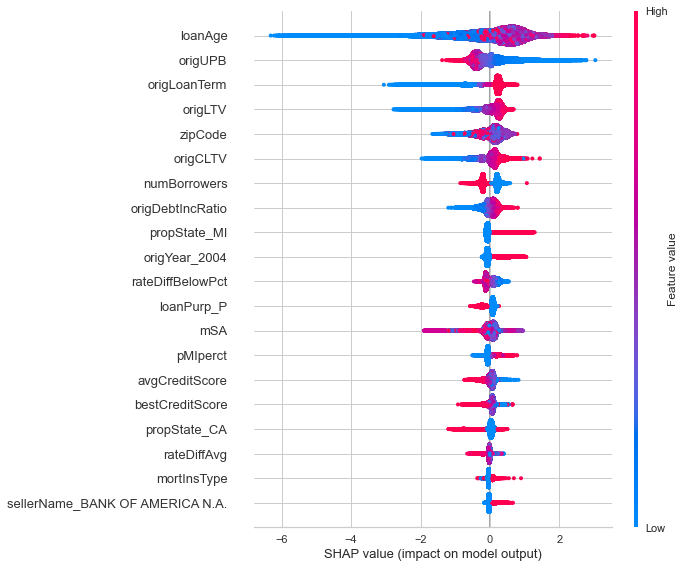

In [102]:
interpret_model(catboost)

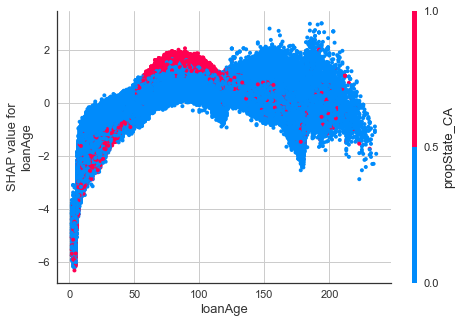

In [104]:
interpret_model(catboost, plot = 'correlation', feature ='loanAge')

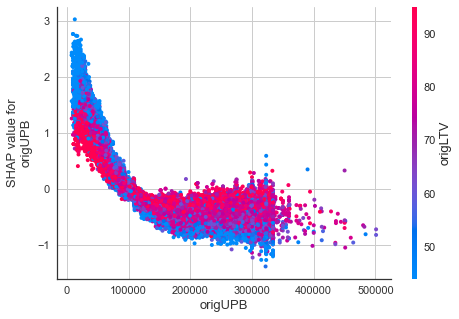

In [111]:
interpret_model(catboost, plot = 'correlation', feature ='origUPB')

In [114]:
interpret_model(catboost, plot = 'reason', observation = 1)

# Tuned Extra Trees Classifier

In [115]:
predictions = predict_model(catboost, data=test_df)

In [116]:
pd.set_option('max_columns',None)
predictions.head()

,origChannel,sellerName,origIntRate,origUPB,origLoanTerm,origLTV,origCLTV,numBorrowers,origDebtIncRatio,loanPurp,propState,zipCode,pMIperct,mortInsType,bestCreditScore,worstCreditScore,avgCreditScore,loanAge,mSA,fmacRateMax,fmacRateMin,fmacRateAvg,fmacRateVolatility,rateDiffAbove,rateDiffBelow,rateDiffAvg,rateDiffAbovePct,rateDiffBelowPct,rateDiffAvgPct,origYear,origMonth,zeroBalCode,Label,Score
0,C,SUNTRUST MORTGAGE INC.,5.250,70000,180,65,65,1,25,C,WA,986,0.0,0,757,757,757,127,38900,5.85,5.79,5.8125,0.010363,-0.600,0.540,-0.5625,-0.102564,0.093264,-0.096774,2003,4,0,0,0.2851
1,C,"JPMORGAN CHASE BANK, NA",5.875,150000,360,53,53,1,27,P,CA,921,0.0,0,780,780,780,71,41740,5.85,5.79,5.8125,0.010363,0.025,-0.085,0.0625,0.004274,-0.014680,0.010753,2003,4,0,0,0.1038
2,R,OTHER,7.875,180000,360,64,64,1,54,C,FL,331,0.0,0,603,603,603,28,33100,7.65,7.13,7.3820,0.072931,0.225,-0.745,0.4930,0.029412,-0.104488,0.066784,2000,12,0,0,0.0390
3,C,"WELLS FARGO BANK, N.A.",5.000,233000,360,60,60,2,25,R,CA,926,0.0,0,759,759,759,108,31100,5.26,5.21,5.2300,0.009597,-0.260,0.210,-0.2300,-0.049430,0.040307,-0.043977,2003,6,0,0,0.0165
4,R,"JPMORGAN CHASE BANK, NA",6.500,147000,360,80,80,1,26,P,GA,300,0.0,0,756,756,756,132,12060,7.14,7.01,7.0775,0.018545,-0.640,0.510,-0.5775,-0.089636,0.072753,-0.081597,2001,4,0,1,0.5417


In [117]:
results = predictions[['zeroBalCode','Label','Score']]

In [118]:
predictions.Label.value_counts()

0    114746
1     49177
Name: Label, dtype: int64

In [119]:
results['Confusion'] = results.apply(calc_confusion, axis=1)

In [120]:
confusionMatrix = results.Confusion.value_counts().to_dict()

In [121]:
cM(confusionMatrix)

           ##############################
           #             #              #
         0 #    111707     #     3039      #
  True     #             #              #
  Class    ##############################
           #             #              #
         1 #    36339      #     12838      #
           #             #              #
           ##############################
                  0              1        
                  Predicted Class           


In [122]:
cMCalc()

TrueNegative:  68.15%
FalseNegative:  1.85%
TruePositive:   7.83%
FalsePositive: 22.17%
#####################################################
Accuracy: 76.0%   Recall: 81.0%   Precision: 26.0%
#####################################################
